<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_04_selfedu_ml_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    L1 = 0.0
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y + L1 * w # np.sign(w)

[[ 10  50 100 500 300]
 [ 20  30 200 300 250]
 [ 25  30 250 300 275]
 [ 20  60 200 600 400]
 [ 15  70 150 700 425]
 [ 40  40 400 400 400]
 [ 30  45 300 450 375]
 [ 20  45 200 450 325]
 [ 40  30 400 300 350]
 [  7  35  70 350 210]]
[ 0.00729325 -0.00477994  0.07293246 -0.04779939  0.01256653]
0.018260784011315048


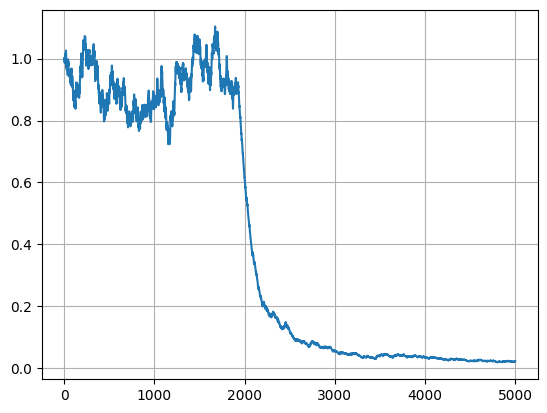

In [ ]:
# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [10*x[0], 10*x[1], 5*(x[0]+x[1])] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])
print(x_train)

fn = len(x_train[0])
n_train = len(x_train)  # размер обучающей выборки
w = np.zeros(fn)        # начальные весовые коэффициенты
nt = 0.00001             # шаг сходимости SGD
lm = 0.01               # скорость "забывания" для Q
N = 5000 # 5000                 # число итераций SGD

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)       # случайный индекс
    ek = loss(w, x_train[k], y_train[k])        # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q                  # пересчет показателя качества
    Q_plot.append(Q)

Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)]) # истинное значение эмпирического риска после обучения
print(w)
print(Q)

plt.plot(Q_plot)
plt.grid(True)
plt.show()